### This script contains the following:

#### 1. Import libraries and data

#### 2. Data cleaning, manipulations, and reprocessing

#### 3. Elbow technique

#### 4. K-means algorithm

#### 5. Scatterplots of clustered data & markdown insights

#### 6. Descriptive statistics, findings, and proposals

### 1. Import libraries and data

In [1]:
# Import libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Ensure the graphs created are displayed in notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path.

path = r'C:\Users\danie\Desktop\CareerFoundry\Achievement 6-Personal Project'
path

'C:\\Users\\danie\\Desktop\\CareerFoundry\\Achievement 6-Personal Project'

In [4]:
# Import data.

df = pd.read_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'Data_Merged_2.csv'))

### 2. Data cleaning, manipulations, and reprocessing

In [5]:
# Investigate dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21503 entries, 0 to 21502
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              21503 non-null  int64  
 1   INSPECTION_TYPE         21503 non-null  object 
 2   JOB_PROGRESS            21503 non-null  int64  
 3   BBL                     21503 non-null  int64  
 4   BORO_CODE               21503 non-null  int64  
 5   ZIP_CODE                21503 non-null  int64  
 6   LATITUDE                21503 non-null  float64
 7   LONGITUDE               21503 non-null  float64
 8   BOROUGH                 21503 non-null  object 
 9   INSPECTION_DATE         21503 non-null  object 
 10  RESULT                  21503 non-null  object 
 11  LOCATION                21503 non-null  object 
 12  COMMUNITY BOARD         21503 non-null  float64
 13  COUNCIL DISTRICT        21503 non-null  float64
 14  CENSUS TRACT            21503 non-null

In [6]:
df.head()

,Unnamed: 0,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,...,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,_merge,year_built_flag
0,0,Initial,1,1014877502,1,10021,40.769070,-73.951009,Manhattan,2023-08-01 10:10:58,...,317169,17939079,56.56,6727154,21.21,11211924,8966,282.69,both,Yes
1,1,Initial,1,3037717501,3,11207,40.668906,-73.895119,Brooklyn,2023-11-15 11:30:00,...,81007,1915816,23.65,919429,11.35,996386,7838,96.76,both,Yes
2,2,Initial,1,3037717501,3,11207,40.669277,-73.895739,Brooklyn,2023-12-13 09:05:47,...,81007,1915816,23.65,919429,11.35,996386,7838,96.76,both,Yes
3,3,Compliance,2,3037717501,3,11207,40.668906,-73.895119,Brooklyn,2023-08-22 10:10:33,...,81007,1915816,23.65,919429,11.35,996386,7838,96.76,both,Yes
4,4,Initial,1,3037717501,3,11207,40.668906,-73.895119,Brooklyn,2023-05-25 11:25:00,...,81007,1915816,23.65,919429,11.35,996386,7838,96.76,both,Yes


In [7]:
# Remove unnecessary columns.

df = df.drop(columns = ['Unnamed: 0', '_merge', 'year_built_flag'])

In [22]:
# Strip ".0" from "COMMUNITY BOARD."

df['COMMUNITY BOARD'] = df['COMMUNITY BOARD'].astype(str).str.rstrip('.0')

In [23]:
# Strip ".0" from "COUNCIL DISTRICT."

df['COUNCIL DISTRICT'] = df['COUNCIL DISTRICT'].astype(str).str.rstrip('.0')

In [24]:
# Strip ".0" from "CENSUS TRACT."

df['CENSUS TRACT'] = df['CENSUS TRACT'].astype(str).str.rstrip('.0')

In [27]:
# Check output.

df

,INSPECTION_TYPE,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,...,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt
0,Initial,1,1014877502,1,10021,40.769070,-73.951009,Manhattan,2023-08-01 10:10:58,Passed,...,209,1986,317169,17939079,56.56,6727154,21.21,11211924,8966,282.69
1,Initial,1,3037717501,3,11207,40.668906,-73.895119,Brooklyn,2023-11-15 11:30:00,Failed for Other R,...,1,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76
2,Initial,1,3037717501,3,11207,40.669277,-73.895739,Brooklyn,2023-12-13 09:05:47,Failed for Other R,...,1,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76
3,Compliance,2,3037717501,3,11207,40.668906,-73.895119,Brooklyn,2023-08-22 10:10:33,Failed for Other R,...,1,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76
4,Initial,1,3037717501,3,11207,40.668906,-73.895119,Brooklyn,2023-05-25 11:25:00,Failed for Other R,...,1,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,Initial,1,1013437501,1,10022,40.754614,-73.967891,Manhattan,2016-03-11 09:44:43,Passed,...,114,1931,79062,3401247,43.02,1116355,14.12,2284892,18284,231.26
21499,Initial,1,1016237501,1,10035,40.800827,-73.944217,Manhattan,2017-05-12 14:32:03,Passed,...,152,2003,109646,2470324,22.53,111181,10.14,1358514,10756,98.10
21500,Initial,1,3000417502,3,11201,40.703055,-73.985739,Brooklyn,2018-06-07 09:25:31,Passed,...,15,1951,37048,1336321,36.07,467546,12.62,868775,6990997,188.70
21501,Initial,1,1004257501,1,10002,40.721033,-73.993744,Manhattan,2012-05-24 11:05:50,Passed,...,16,19,26783,967134,36.11,271044,10.12,696090,5255,196.21


In [28]:
# Export df sans unnecessary columns to csv.

df.to_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'Data_Merged_3.csv'))

In [29]:
# Remove categorical variables unnecessary for k-means clustering.

df_1 = df.drop(columns = ['INSPECTION_TYPE', 'BOROUGH', 'RESULT', 'NEIGHBORHOOD', 'INSPECTION_DATE', 'LOCATION', 'Address', 'Neighborhood'])

In [30]:
# Check column drop.

df_1

,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,year,...,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt
0,1,1014877502,1,10021,40.769070,-73.951009,8,5,13201,2023,...,209,1986,317169,17939079,56.56,6727154,21.21,11211924,8966,282.69
1,1,3037717501,3,11207,40.668906,-73.895119,5,42,1156,2023,...,1,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76
2,1,3037717501,3,11207,40.669277,-73.895739,5,42,1156,2023,...,1,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76
3,2,3037717501,3,11207,40.668906,-73.895119,5,42,1156,2023,...,1,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76
4,1,3037717501,3,11207,40.668906,-73.895119,5,42,1156,2023,...,1,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,1,1013437501,1,10022,40.754614,-73.967891,6,4,98,2016,...,114,1931,79062,3401247,43.02,1116355,14.12,2284892,18284,231.26
21499,1,1016237501,1,10035,40.800827,-73.944217,11,9,184,2017,...,152,2003,109646,2470324,22.53,111181,10.14,1358514,10756,98.10
21500,1,3000417502,3,11201,40.703055,-73.985739,2,33,21,2018,...,15,1951,37048,1336321,36.07,467546,12.62,868775,6990997,188.70
21501,1,1004257501,1,10002,40.721033,-73.993744,3,1,18,2012,...,16,19,26783,967134,36.11,271044,10.12,696090,5255,196.21


In [31]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21503 entries, 0 to 21502
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   JOB_PROGRESS            21503 non-null  int64  
 1   BBL                     21503 non-null  int64  
 2   BORO_CODE               21503 non-null  int64  
 3   ZIP_CODE                21503 non-null  int64  
 4   LATITUDE                21503 non-null  float64
 5   LONGITUDE               21503 non-null  float64
 6   COMMUNITY BOARD         21503 non-null  object 
 7   COUNCIL DISTRICT        21503 non-null  object 
 8   CENSUS TRACT            21503 non-null  object 
 9   year                    21503 non-null  int64  
 10  inspection_month        21503 non-null  int64  
 11  distance_times_square   21503 non-null  float64
 12  Total Units             21503 non-null  int64  
 13  Year Built              21503 non-null  int64  
 14  Gross SqFt              21503 non-null

In [37]:
# Convert COMMUNITY BOARD variable to int64.

df_1['COMMUNITY BOARD'] = df_1['COMMUNITY BOARD'].astype('int64')

In [38]:
# Convert COUNCIL DISTRICT variable to int64.

df_1['COUNCIL DISTRICT'] = df_1['COUNCIL DISTRICT'].astype('int64')

In [39]:
# Convert CENSUS TRACT variable to int64.

df_1['CENSUS TRACT'] = df_1['CENSUS TRACT'].astype('int64')

In [40]:
# Check data type changes.

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21503 entries, 0 to 21502
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   JOB_PROGRESS            21503 non-null  int64  
 1   BBL                     21503 non-null  int64  
 2   BORO_CODE               21503 non-null  int64  
 3   ZIP_CODE                21503 non-null  int64  
 4   LATITUDE                21503 non-null  float64
 5   LONGITUDE               21503 non-null  float64
 6   COMMUNITY BOARD         21503 non-null  int64  
 7   COUNCIL DISTRICT        21503 non-null  int64  
 8   CENSUS TRACT            21503 non-null  int64  
 9   year                    21503 non-null  int64  
 10  inspection_month        21503 non-null  int64  
 11  distance_times_square   21503 non-null  float64
 12  Total Units             21503 non-null  int64  
 13  Year Built              21503 non-null  int64  
 14  Gross SqFt              21503 non-null

In [44]:
df_1

,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,year,...,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt
0,1,1014877502,1,10021,40.769070,-73.951009,8,5,13201,2023,...,209,1986,317169,17939079,56.56,6727154,21.21,11211924,8966,282.69
1,1,3037717501,3,11207,40.668906,-73.895119,5,42,1156,2023,...,1,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76
2,1,3037717501,3,11207,40.669277,-73.895739,5,42,1156,2023,...,1,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76
3,2,3037717501,3,11207,40.668906,-73.895119,5,42,1156,2023,...,1,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76
4,1,3037717501,3,11207,40.668906,-73.895119,5,42,1156,2023,...,1,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,1,1013437501,1,10022,40.754614,-73.967891,6,4,98,2016,...,114,1931,79062,3401247,43.02,1116355,14.12,2284892,18284,231.26
21499,1,1016237501,1,10035,40.800827,-73.944217,11,9,184,2017,...,152,2003,109646,2470324,22.53,111181,10.14,1358514,10756,98.10
21500,1,3000417502,3,11201,40.703055,-73.985739,2,33,21,2018,...,15,1951,37048,1336321,36.07,467546,12.62,868775,6990997,188.70
21501,1,1004257501,1,10002,40.721033,-73.993744,3,1,18,2012,...,16,19,26783,967134,36.11,271044,10.12,696090,5255,196.21


In [41]:
# Export df_1 to csv.

df_1.to_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'Data_Merged_Quantitative.csv'))

### 3. Elbow technique

In [42]:
# Define range of potential clusters in the data and k-means cluster based on assigned range.

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [45]:
# Create score that represents rate of variation for the cluster option above.

score = [kmeans[i].fit(df_1).score(df_1) for i in range(len(kmeans))]
score

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-1.8460079010649096e+22,
 -2.254189413449575e+21,
 -9.849217224545096e+20,
 -1.2106785750064153e+20,
 -1.692855479507129e+19,
 -8.767098972579586e+18,
 -6.461302820653855e+18,
 -5.524754439287016e+18,
 -4.907920107147775e+18]

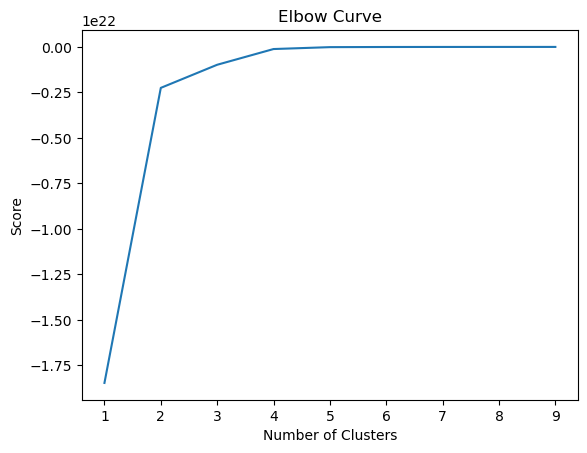

In [46]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The above Elbow Curve, there's a large jump from 1 to 2 clusters, then another jump from 2 to 4 clusters before flattening out. I'm choosing 4 clusters as the optimal number because it's the point where the elbow curve straightens out.

### 4. K-means algorithm

In [47]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [48]:
# Fit the k-means object to the data.

kmeans.fit(df_1)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [49]:
# Create new column in df_1 with the resulting clusters.

df_1['clusters'] = kmeans.fit_predict(df_1)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [50]:
df_1

,JOB_PROGRESS,BBL,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,year,...,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,clusters
0,1,1014877502,1,10021,40.769070,-73.951009,8,5,13201,2023,...,1986,317169,17939079,56.56,6727154,21.21,11211924,8966,282.69,0
1,1,3037717501,3,11207,40.668906,-73.895119,5,42,1156,2023,...,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76,1
2,1,3037717501,3,11207,40.669277,-73.895739,5,42,1156,2023,...,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76,1
3,2,3037717501,3,11207,40.668906,-73.895119,5,42,1156,2023,...,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76,1
4,1,3037717501,3,11207,40.668906,-73.895119,5,42,1156,2023,...,2007,81007,1915816,23.65,919429,11.35,996386,7838,96.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,1,1013437501,1,10022,40.754614,-73.967891,6,4,98,2016,...,1931,79062,3401247,43.02,1116355,14.12,2284892,18284,231.26,0
21499,1,1016237501,1,10035,40.800827,-73.944217,11,9,184,2017,...,2003,109646,2470324,22.53,111181,10.14,1358514,10756,98.10,0
21500,1,3000417502,3,11201,40.703055,-73.985739,2,33,21,2018,...,1951,37048,1336321,36.07,467546,12.62,868775,6990997,188.70,1
21501,1,1004257501,1,10002,40.721033,-73.993744,3,1,18,2012,...,19,26783,967134,36.11,271044,10.12,696090,5255,196.21,0


In [51]:
# Check clusters column value count.

df_1['clusters'].value_counts()

clusters
0    16177
1     3133
2     1220
3      973
Name: count, dtype: int64

### 5. Scatterplots of clustered data & markdown insights

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


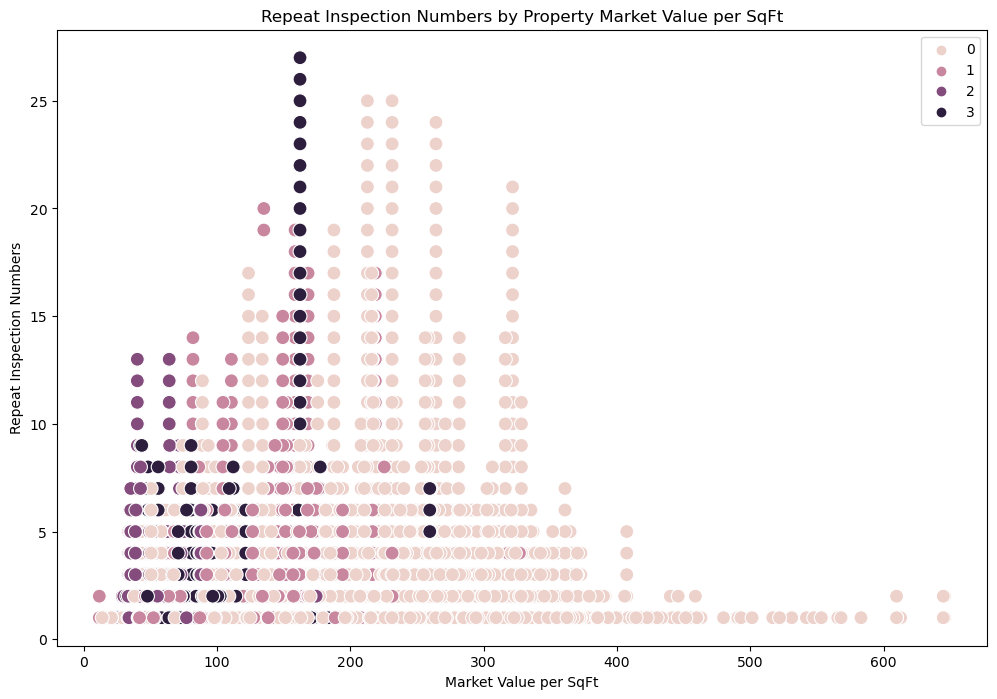

In [53]:
# Plot the clusters for the "Market Value per SqFt" and "JOB_PROGRESS" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['Market Value per SqFt'], y=df_1['JOB_PROGRESS'], hue=kmeans.labels_, s=100) 
ax.grid(False) # Remove the grid from the background.
plt.title('Repeat Inspection Numbers by Property Market Value per SqFt')
plt.xlabel('Market Value per SqFt')
plt.ylabel('Repeat Inspection Numbers')
plt.show()

In [54]:
# Export scatterplot.

ax.figure.savefig(os.path.join(path, '02-2024 NYC Rats','04 Analysis', 'Visualizations', 'market_value_cluster_plot.png'))

The above clustered scatterplot for Repeat Inspection Numbers by Market Value per SqFt of each inspection site doesn't make a lot of sense to me. The pale pink cluster (coded as “0” in the legend) is the most populated and includes repeat inspection numbers of inspection sites that run the entire range of market value per square foot values. I think the reason for this might be that each row in the dataset is an inspection, so the same location gets replotted for every inspection that's done at the site. If I want to get a count of total inspections per site, I would need to filter the data so that only includes the row with the highest JOB_PROGRESS number for each location.

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


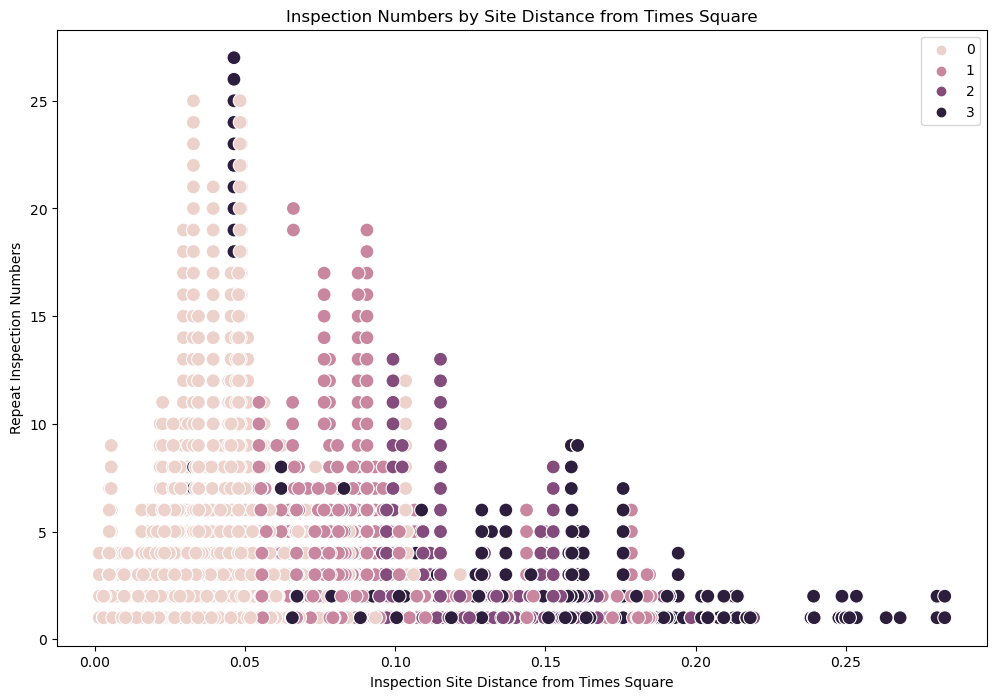

In [55]:
# Plot the clusters for the "distance_times_squre" and "JOB_PROGRESS" variables.

plt.figure(figsize=(12,8))
ax_1 = sns.scatterplot(x=df_1['distance_times_square'], y=df_1['JOB_PROGRESS'], hue=kmeans.labels_, s=100) 
ax_1.grid(False) # Remove the grid from the background.
plt.title('Inspection Numbers by Site Distance from Times Square')
plt.xlabel('Inspection Site Distance from Times Square')
plt.ylabel('Repeat Inspection Numbers')
plt.show()

In [56]:
# Export scatterplot.

ax_1.figure.savefig(os.path.join(path, '02-2024 NYC Rats','04 Analysis', 'Visualizations', 'times_square_cluster_plot.png'))

The above clustered scatterplot for Repeat Inspection Numbers by Site Distance from Times Square has much clearer clusters. Again, the pale pink cluster (coded as “0” in the legend) is the most populated and it indicates that inspection sites with smaller distances from Times Square have higher repeat inspection numbers. The subsequent clusters are generally oriented by greater distances from Times Square.

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


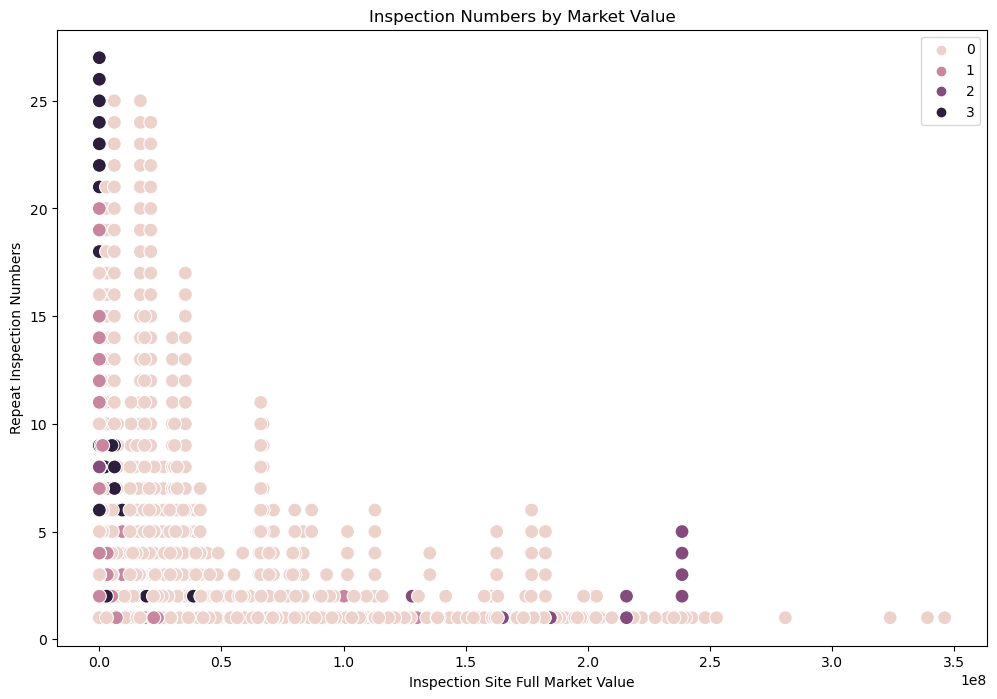

In [58]:
# Plot the clusters for the "Full Market Value" and "JOB_PROGRESS" variables.

plt.figure(figsize=(12,8))
ax_2 = sns.scatterplot(x=df_1['Full Market Value'], y=df_1['JOB_PROGRESS'], hue=kmeans.labels_, s=100) 
ax_2.grid(False) # Remove the grid from the background.
plt.title('Inspection Numbers by Market Value')
plt.xlabel('Inspection Site Full Market Value')
plt.ylabel('Repeat Inspection Numbers')
plt.show()

In [60]:
# Export scatterplot.

ax_2.figure.savefig(os.path.join(path, '02-2024 NYC Rats','04 Analysis', 'Visualizations', 'market_value_cluster_plot.png'))

The above clustered scatterplot for Repeat Inspection Numbers by Full Market Value per SqFt of each inspection site has the same issues as the first printed clustered scatterplot that illustrated Repeat Inspection Numbers by Market Value per SqFt. The pale pink cluster (coded as “0” in the legend) is the most populated and includes repeat inspection numbers of inspection sites that run the entire range of market value per square foot values. Potential insights from this clustered scatterplot are unclear.

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


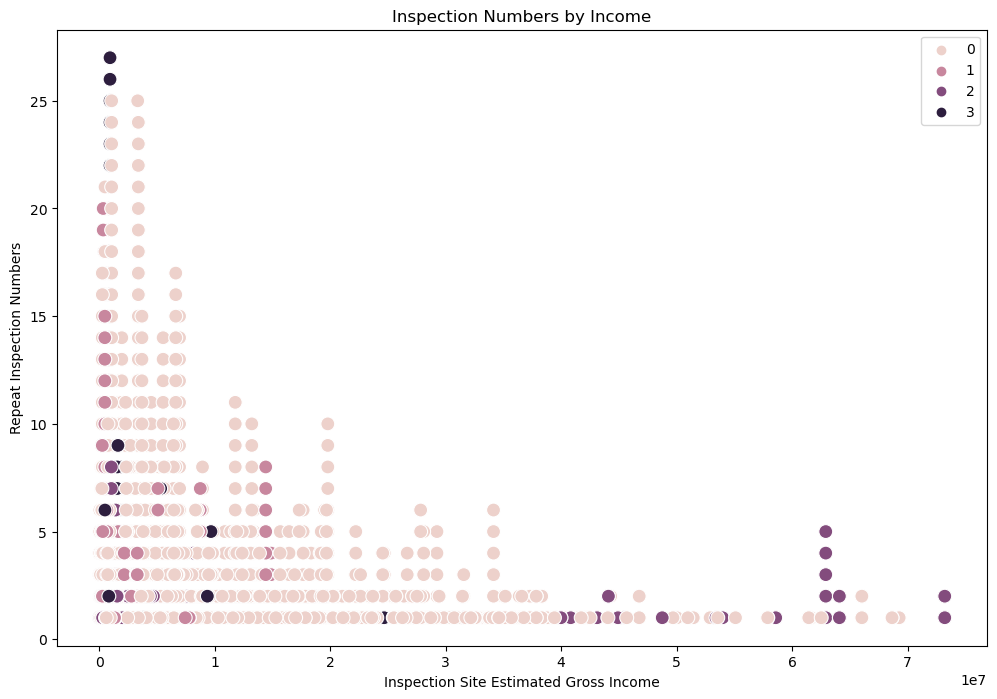

In [59]:
# Plot the clusters for the "Estimated Gross Income" and "JOB_PROGRESS" variables.

plt.figure(figsize=(12,8))
ax_3 = sns.scatterplot(x=df_1['Estimated Gross Income'], y=df_1['JOB_PROGRESS'], hue=kmeans.labels_, s=100) 
ax_3.grid(False) # Remove the grid from the background.
plt.title('Inspection Numbers by Income')
plt.xlabel('Inspection Site Estimated Gross Income')
plt.ylabel('Repeat Inspection Numbers')
plt.show()

In [61]:
# Export scatterplot.

ax_3.figure.savefig(os.path.join(path, '02-2024 NYC Rats','04 Analysis', 'Visualizations', 'gross_income_cluster_plot.png'))

Like the two market value-related scatterplots, the above scatterplot of Repeat Inspection Numbers by Inspection Site Gross Income have a cluster code of "0" for the majority of data points. I notice that darkest purple data points with a cluster code of "3" only occur in the low range of all three of these scatterplots. It appears that when correlated repeat inspection numbers with financial data, there's a significant grouping of data points with the highest repeat inspection rates and lower market values or gross income.

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


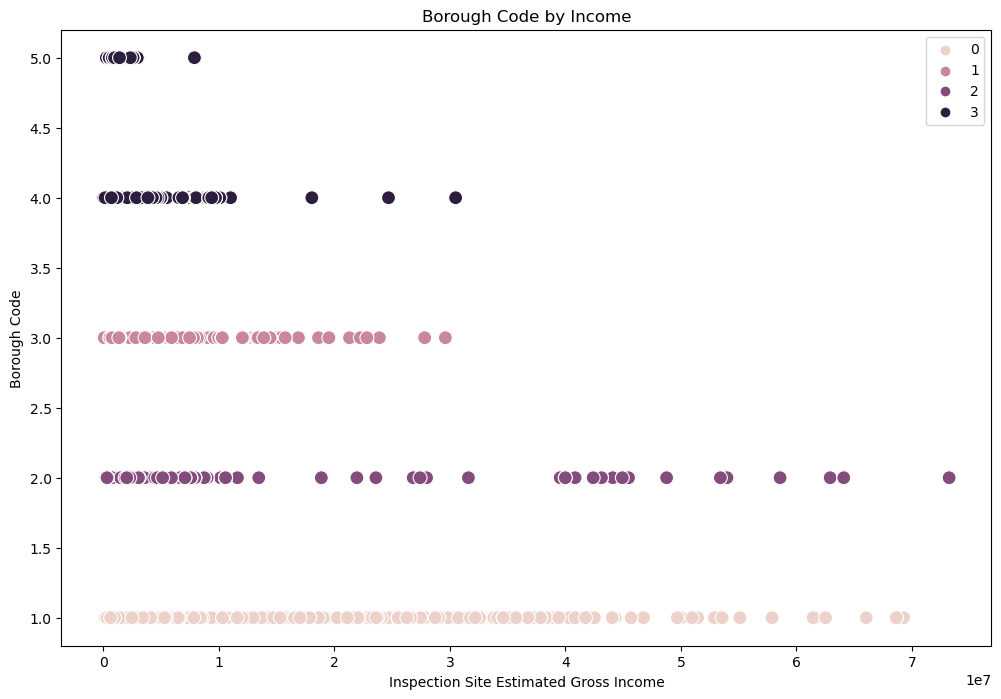

In [62]:
# Plot the clusters for the "Estimated Gross Income" and "BORO_CODE" variables.

plt.figure(figsize=(12,8))
ax_4 = sns.scatterplot(x=df_1['Estimated Gross Income'], y=df_1['BORO_CODE'], hue=kmeans.labels_, s=100) 
ax_4.grid(False) # Remove the grid from the background.
plt.title('Borough Code by Income')
plt.xlabel('Inspection Site Estimated Gross Income')
plt.ylabel('Borough Code')
plt.show()

In an effort to plot a variable besides Repeat Inspection Numbers, the above clustered scatterplot illustrates Borough Code by Inspection Site Estimated Gross Income. Borough codes correspond as follows: 1 = Manhattan, 2 = the Bronx, 3 = Brooklyn, 4 = Queens, and 5 = Staten Island. The scatterplot illustrates that inspection sites in Manhattan generally have the largest range and highest estimated gross income, followed by those in the Bronx (with an outlier inspection site with the highest gross income overall). Brooklyn inspection sites have gross incomes that are middle to low in range, and Queens and Staten Island have the lowest gross incomes. This makes sense because property values tend to decrease as inspection sites are further away from NYC center.

### 6. Descriptive statistics, findings, and proposals

In [63]:
#  Relabel the clusters from numbers to color names.

df_1.loc[df_1['clusters'] == 3, 'cluster'] = 'dark purple'
df_1.loc[df_1['clusters'] == 2, 'cluster'] = 'light purple'
df_1.loc[df_1['clusters'] == 1, 'cluster'] = 'dark pink'
df_1.loc[df_1['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\danie\AppData\Local\Temp\ipykernel_11604\2054198555.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_1.loc[df_1['clusters'] == 3, 'cluster'] = 'dark purple'


In [64]:
# Calculate descriptive statistics for clusters using the groupby() function.

df_1.groupby('cluster').agg({'JOB_PROGRESS':['mean', 'median'], 
                         'Market Value per SqFt':['mean', 'median'], 
                         'distance_times_square':['mean', 'median'],
                        'Full Market Value':['mean', 'median'],
                          'Estimated Gross Income':['mean', 'median']})

JOB_PROGRESS        Market Value per SqFt          \
                     mean median                  mean  median   
cluster                                                          
dark pink        1.766358    1.0            136.808305  137.70   
dark purple      2.086331    1.0            104.795653   87.51   
light pink       1.522037    1.0            218.891795  221.13   
light purple     1.553279    1.0             65.740082   60.64   

             distance_times_square           Full Market Value             \
                              mean    median              mean     median   
cluster                                                                     
dark pink                 0.084528  0.078956      2.661498e+06    17351.0   
dark purple               0.127269  0.127852      2.560541e+06    39918.0   
light pink                0.038614  0.036346      1.275472e+07  1977999.0   
light purple              0.121031  0.115056      5.926948e+06     7029.0   

             Estimated Gross Income             
                               mean     median  
cluster                                         
dark pink              1.505737e+06   699535.0  
dark purple            1.905238e+06   945490.0  
light pink             4.479832e+06  2181448.0  
light purple           4.895961e+06  1468431.0

##### Findings

The median JOB_PROGRESS number for all categories is 1. This further illustrates that the vast majority of inspection sites have only one inspection.
The light pink category has the highest mean market value per square foot, the highest median full market value and estimated gross income, and the smallest mean and median distances to Times Square.
The light purple category had the smallest mean and median market values, but it had the largest mean estimated gross income.

###### Proposals on what these results could be useful for in future steps of an analytics pipeline

Geographical location (proximity to Times Square) and an inspection site's full market value seem to be factors in the number of repeat inspections that occur. Data could be filtered to include only the highest JOB_PROGRESS number to get a discrete number of inspections for a single site. Inspection locations could be flagged into categories based on relative market values for the borough.